# Smithers overview

[**Smithers**](https://github.com/mathLab/Smithers) is developed by **SISSA mathlab** and it contains some useful datasets and a multi-purpose toolbox that inherits functionality from other packages to make the process of dealing with these datasets much easier with more compact coding.

The package can be installed using:

```bash
> python -m pip install smithers -U 
```

# Navier Stokes Dataset 

**Navier Stokes Dataset** contains the output data from a CFD simulation described by the (incompressible) Navier Stokes equations.

In the following steps we will explore the attributes of the `NavierStokesDataset()` class:
- `.snapshots`: the matrices of snapshots stored by row (one matrix for any output field).
- `.params`: the matrix of corresponding parameters.
- `.pts_coordinates`: the coordinates of all nodes of the discretize space.
- `.faces`: the actual topology of the discretized space.
- `.triang`: the triangulation, useful especially for rendering purposes. 


## Import the dataset:

In [1]:
from smithers.dataset import NavierStokesDataset
data = NavierStokesDataset()

## Exploring the snapshots:

`data.snapshots` returns a dictionary with 4 keys (physical properties) which are:
- **vx:** velocity in the X-direction. 
- **vy:** velocity in the Y-direction. 
- **mag(v):** velocity magnitude.
- **p:** pressure value.

For each physical property (key) there is a 2-D array of the shape (500,1639):
- Each row of the 500 represents a snapshot.
- Each snapshot/row contains the values of a particular physical property at 1639 nodes/elements (since the data is from FE analysis).

In [2]:
type(data.snapshots)

dict

In [3]:
len(data.snapshots)

4

In [4]:
data.snapshots.keys()

dict_keys(['vx', 'vy', 'mag(v)', 'p'])

In [5]:
type(data.snapshots['vx'])

numpy.ndarray

In [6]:
data.snapshots['vx'].shape

(500, 1639)

## Exploring the parameters:

`data.params` returns a 2-D array of the shape (500,1).

We have only one parameter which is the inlet velocity that corresponds to the 500 snapshots. 

In [7]:
type(data.params)

numpy.ndarray

In [8]:
data.params.shape

(500, 1)

## Exploring the coordinates of the points:

We can understand from below that this data is the result of a 2-D finite element simulation (2 rows = 2 coordinates) with 1639 elements/points. 

In [9]:
type(data.pts_coordinates)

numpy.ndarray

In [10]:
data.pts_coordinates.shape

(2, 1639)

## Exploring the topology of the discretized space:

We can see here that we have 3091 cells, where each cell is composed of 3 points (triangular cells).

By having:
1. `data.faces` --> For each triangle, they are the indices of the three points that make up the triangle.
2. `data.pts_coordinates` --> X and Y coordinates of the grid points.

We can construct the triangular grid: `Triangulation(x, y, triangles=data.faces)`

In this case, thanks to **Smithers**, we can call the triangular grid directly using `data.triang`

In [11]:
type(data.faces)

numpy.ndarray

In [12]:
data.faces.shape

(3091, 3)

In [13]:
type(data.triang)

matplotlib.tri.triangulation.Triangulation

## Visualization:
Visualize some of the snapshots in the dataset.

In [14]:
for name in ['vx', 'vy', 'p', 'mag(v)']:
    print('Shape of {:7s} snapshots matrix: {}'.format(name, data.snapshots[name].shape))
    
print('Shape of parameters matrix: {}'.format(data.params.shape))

Shape of vx      snapshots matrix: (500, 1639)
Shape of vy      snapshots matrix: (500, 1639)
Shape of p       snapshots matrix: (500, 1639)
Shape of mag(v)  snapshots matrix: (500, 1639)
Shape of parameters matrix: (500, 1)


In [15]:
import matplotlib.tri as mtri
import matplotlib.pyplot as plt
%matplotlib inlineplt.rcParams['figure.facecolor'] = 'white'

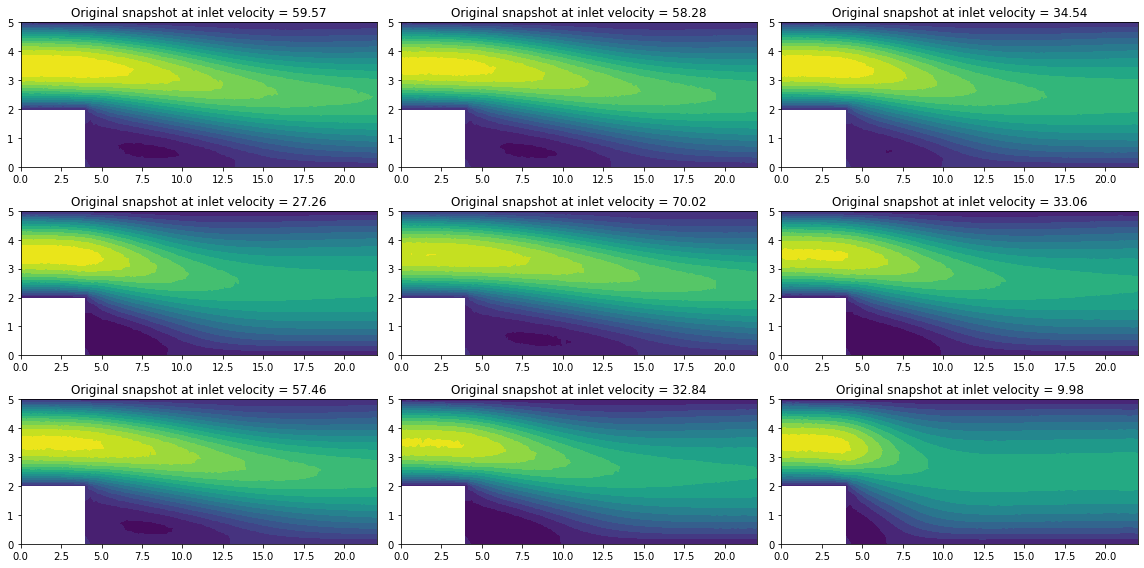

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16, 8))
ax = ax.flatten()
for i in range(9):
    ax[i].set_title('Original snapshot at inlet velocity = {}'.format(*data.params[i].round(2)))
    ax[i].tricontourf(data.triang, data.snapshots['vx'][i], levels=16)

plt.tight_layout()

Try also:
```python
ax[i].tricontour(data.triang, data.snapshots['vx'][i], levels=16)

ax[i].tripcolor(data.triang, data.snapshots['vx'][i])

ax[i].triplot(data.triang, 'b-', lw=0.2)
```

**In future we will add further description for the other datasets in Smithers.**